[[8.         8.         8.         0.58039218 0.84705883 1.        ]
 [8.         8.         0.         0.98431373 0.99215686 1.        ]
 [8.         0.         8.         0.6156863  0.85882354 1.        ]
 ...
 [0.         7.         7.         0.58039218 0.84705883 1.        ]
 [1.         0.         7.         0.58039218 0.84705883 1.        ]
 [1.         1.         8.         0.58039218 0.84705883 1.        ]]
[[0 0 0]
 [0 0 1]
 [0 0 2]
 ...
 [8 8 6]
 [8 8 7]
 [8 8 8]]
(386, 3)


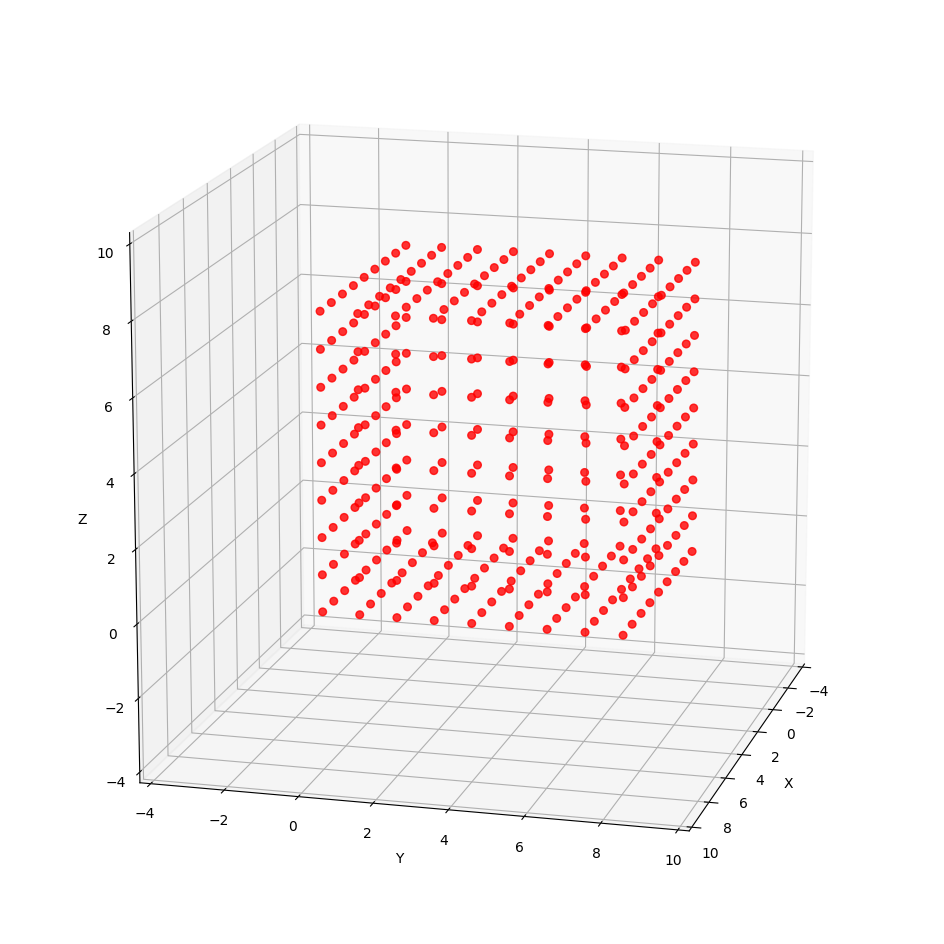

In [1]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#これ9*9*9になってるから直す（色確認してから）
b = np.loadtxt('C:\\Users\\ku-admin\\Desktop\\blender-windows64\\output.txt')
b = b[:,0:6]
print(b)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0).astype(np.int32)
print(virtex)
print(virtex.shape)

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-4,10)
ax.set_ylim(-4,10)
ax.set_zlim(-4,10)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(virtex[:,0], virtex[:,1], virtex[:,2], s = 30, c = "red", alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")

plt.show()


#X,Y,Zを再び行列にして、重複要素を削除(unique)

[[0.58039218 0.84705883 1.        ]
 [0.98431373 0.99215686 1.        ]
 [0.6156863  0.85882354 1.        ]
 ...
 [0.58039218 0.84705883 1.        ]
 [0.58039218 0.84705883 1.        ]
 [0.58039218 0.84705883 1.        ]]


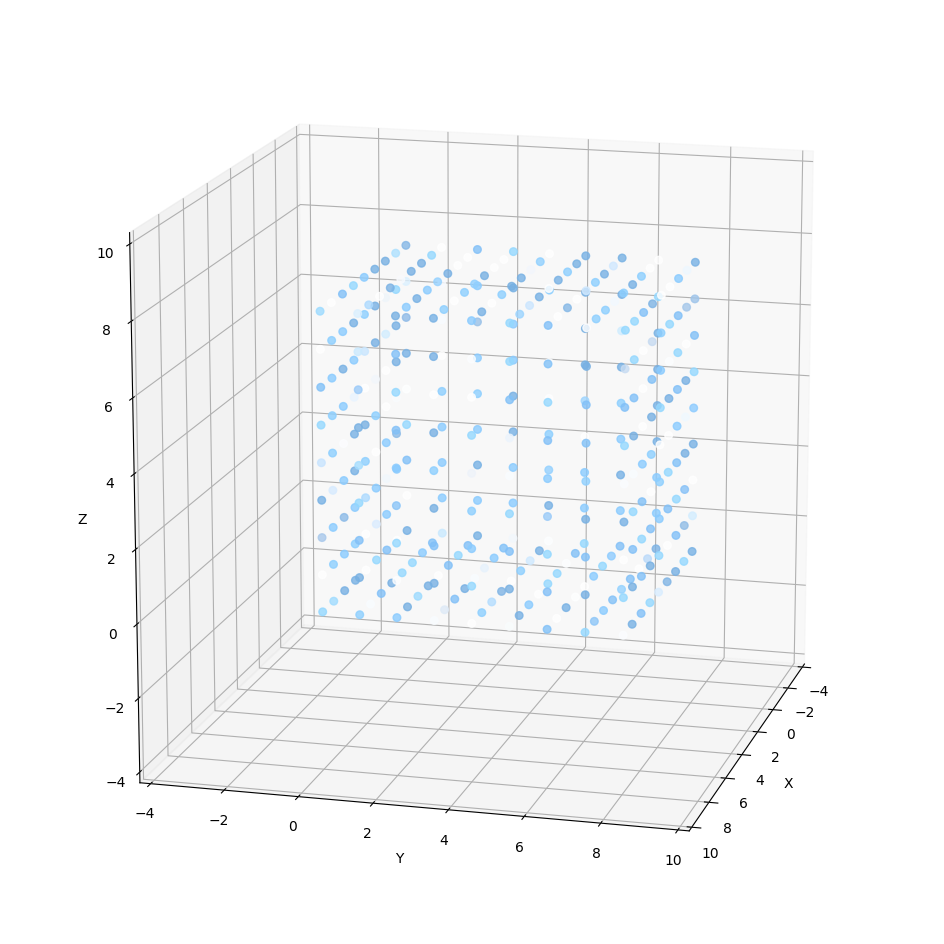

In [2]:
colors_seikika = b[:,3:6]
print(colors_seikika)


# Figureを追加
fig = plt.figure(figsize = (12, 12))
# 3DAxesを追加
ax = fig.add_subplot(projection='3d')
# Axesのタイトルを設定
ax.set_title("", size = 20)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-4,10)
ax.set_ylim(-4,10)
ax.set_zlim(-4,10)
ax.scatter(b[:,0], b[:,1], b[:,2], s = 30, c = colors_seikika, alpha = 0.8)
ax.view_init(elev=15, azim=15)
ax.set_aspect('equal')
ax.axis("on")
plt.show()

In [3]:
#座標色情報をソート
import numpy as np

# 各行を数値に変換する関数を定義します
def combine(row):
    return row[0]*100 + row[1]*10 + row[2]
# 各行を数値に変換し、その結果に基づいてインデックスをソートします
indices = np.argsort(np.apply_along_axis(combine, 1, b))
# ソートされたインデックスを用いて行をソートします
b_sorted = b[indices]
print(b_sorted)


[[0.         0.         0.         0.46666667 0.69411767 0.89411765]
 [0.         0.         1.         1.         1.         1.        ]
 [0.         0.         2.         0.50980395 0.75294119 0.96862745]
 ...
 [8.         8.         6.         0.50980395 0.75294119 0.96862745]
 [8.         8.         7.         0.78431374 0.86274511 0.94901961]
 [8.         8.         8.         0.58039218 0.84705883 1.        ]]


In [4]:
#座標の差分を取得
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


# 二点間の距離を計算する関数
def distance(p1, p2):
    #return np.sqrt(np.sum((p1 - p2) ** 2))
    return np.max(np.abs(p1 - p2))

def greedy_path(coordinates, s):
    unvisited = set(range(len(coordinates)))
    current = 0
    path = [current]
    unvisited.remove(current)
    
    while unvisited:
        min_distance = float('inf')
        nearest_neighbor = None
        for neighbor in unvisited:
            dist = distance(coordinates[current], coordinates[neighbor])
            if dist <= s:
                nearest_neighbor = neighbor
                break
            elif dist < min_distance:
                min_distance = dist
                nearest_neighbor = neighbor
                
        current = nearest_neighbor
        path.append(current)
        unvisited.remove(current)
        #print(path)
    return path

# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 0.1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)

    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

s = 1
n = 10

# 座標データを生成
coordinates = b_sorted[:,0:3]
#print(coordinates)
# 貪欲法で最短経路を求める
path = greedy_path(coordinates,s)
print(path)
# 経路をプロット
#plot_path(path, coordinates)

# 座標データをNumPy配列として出力
output_coordinates = np.array([b_sorted[index] for index in path])
#print(output_coordinates) #これをもとに色は送信する(0-255で正規化をする)
#これで、色含めた点群情報を経路順にソートすることができた

virtex_before = output_coordinates[0:output_coordinates.shape[0]-1,0:3]
virtex_after = output_coordinates[1:output_coordinates.shape[0],0:3]
diff = virtex_after - virtex_before
print(output_coordinates)


#DCT 乗算ができるので、ちょっと精度をあげましたってことで、DCTを改善する
#今のDCTの論文をもう一度確認する


[0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 15, 14, 13, 12, 11, 10, 9, 18, 19, 20, 21, 22, 23, 24, 25, 17, 26, 34, 33, 32, 31, 30, 29, 28, 27, 36, 37, 38, 39, 40, 41, 42, 43, 35, 44, 52, 51, 50, 49, 48, 47, 46, 45, 54, 55, 56, 57, 58, 59, 60, 61, 53, 62, 70, 69, 68, 67, 66, 65, 64, 63, 72, 73, 74, 75, 76, 77, 78, 79, 71, 80, 103, 101, 99, 97, 95, 93, 91, 88, 87, 86, 85, 84, 83, 82, 81, 90, 92, 94, 96, 98, 100, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 135, 133, 131, 129, 127, 125, 123, 89, 120, 119, 118, 117, 116, 115, 114, 113, 122, 124, 126, 128, 130, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 167, 165, 163, 161, 159, 157, 155, 121, 152, 151, 150, 149, 148, 147, 146, 145, 154, 156, 158, 160, 162, 164, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 199, 197, 195, 193, 191, 189, 187, 153, 184, 183, 182, 181, 180, 179, 178, 177, 186, 188, 190, 192, 194, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 231, 229, 227, 225, 223, 221, 219, 185, 216, 215, 214, 213, 212, 211,

In [5]:
#差分から送信命令を作る
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

code_virtex = np.empty((diff.shape[0]), dtype=np.int32)

diff = diff.astype(np.int32)
import numpy as np

#ここを直す Zの場合分けで
for i in range(diff.shape[0]):
    if np.array_equal(diff[i], [-1, -1, -1]):
        code_virtex[i] = 16
    elif np.array_equal(diff[i], [-1, -1, 0]):
        code_virtex[i] = 17
    elif np.array_equal(diff[i], [-1, -1, 1]):
        code_virtex[i] = 18
    elif np.array_equal(diff[i], [-1, 0, -1]):
        code_virtex[i] = 19
    elif np.array_equal(diff[i], [-1, 0, 0]):
        code_virtex[i] = 20
    elif np.array_equal(diff[i], [-1, 0, 1]):
        code_virtex[i] = 21
    elif np.array_equal(diff[i], [-1, 1, -1]):
        code_virtex[i] = 22
    elif np.array_equal(diff[i], [-1, 1, 0]):
        code_virtex[i] = 23
    elif np.array_equal(diff[i], [0, -1, -1]):
        code_virtex[i] = 0
    elif np.array_equal(diff[i], [0, -1, 0]):
        code_virtex[i] = 1
    elif np.array_equal(diff[i], [0, -1, 1]):
        code_virtex[i] = 2
    elif np.array_equal(diff[i], [0, 0, -1]):
        code_virtex[i] = 3
    elif np.array_equal(diff[i], [0, 0, 1]):
        code_virtex[i] = 4
    elif np.array_equal(diff[i], [0, 1, -1]):
        code_virtex[i] = 5
    elif np.array_equal(diff[i], [0, 1, 0]):
        code_virtex[i] = 6
    elif np.array_equal(diff[i], [0, 1, 1]):
        code_virtex[i] = 7
    elif np.array_equal(diff[i], [1, -1, -1]):
        code_virtex[i] = 8
    elif np.array_equal(diff[i], [1, -1, 0]):
        code_virtex[i] = 9
    elif np.array_equal(diff[i], [1, -1, 1]):
        code_virtex[i] = 10
    elif np.array_equal(diff[i], [1, 0, -1]):
        code_virtex[i] = 11
    elif np.array_equal(diff[i], [1, 0, 0]):
        code_virtex[i] = 12
    elif np.array_equal(diff[i], [1, 0, 1]):
        code_virtex[i] = 13
    elif np.array_equal(diff[i], [1, 1, -1]):
        code_virtex[i] = 14
    elif np.array_equal(diff[i], [1, 1, 0]):
        code_virtex[i] = 15
    elif np.array_equal(diff[i], [-1, 1, 1]):
        code_virtex[i] = 24 
    elif np.array_equal(diff[i], [1, 1, 1]):
        code_virtex[i] = 25
    else: 
        code_virtex[i] = 26
        #28のあとの3つの数字はそれぞれxyz座標を表している(virtex_after)
        code_virtex = np.insert(code_virtex, i+1, virtex_after[i])
    
code_virtex = np.insert(code_virtex, 0, virtex_before[0]) #最初の座標を追加  
code_virtex = np.insert(code_virtex, code_virtex.shape, 27) #最後に終了を示す29を追加
code_virtex = np.insert(code_virtex, 0, 31) #最初に同期用の0を追加（同期は1に変更する（11111なので31になる））
print(code_virtex)
print(code_virtex.shape)


#0つ目は同期用信号
#一つ目は絶対値に
#ifで
#該当しない場合は、該当なしコードから絶対値を取得、コードに




[31  0  0  0  4  4  4  4  4  4  4  4  5  3  3  3  3  3  3  3  6  4  4  4
  4  4  4  4  2  6  5  3  3  3  3  3  3  3  6  4  4  4  4  4  4  4  2  6
  5  3  3  3  3  3  3  3  6  4  4  4  4  4  4  4  2  6  5  3  3  3  3  3
  3  3  6  4  4  4  4  4  4  4  2  6  9  1  1  1  1  1  1  0  3  3  3  3
  3  3  3  6  6  6  6  6  6  6  6  4  4  4  4  4  4  4  4  9  1  1  1  1
  1  1 17 11  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  4  4  4  4  4
  4  4  4  9  1  1  1  1  1  1 17 11  3  3  3  3  3  3  3  6  6  6  6  6
  6  6  6  4  4  4  4  4  4  4  4  9  1  1  1  1  1  1 17 11  3  3  3  3
  3  3  3  6  6  6  6  6  6  6  6  4  4  4  4  4  4  4  4  9  1  1  1  1
  1  1 17 11  3  3  3  3  3  3  3  6  6  6  6  6  6  6  6  4  4  4  4  4
  4  4  4  9  1  1  1  1  1  1 17 11  3  3  3  3  3  3  3  6  6  6  6  6
  6  6  6  4  4  4  4  4  4  4  4  9  1  1  1  1  1  1 17 11  3  3  3  3
  3  3  3  6  6  6  6  6  6  6  6  4  4  4  4  4  4  4  4  8  0  0  0  0
  0  0  0  4  4  4  4  4  4  4 21 12  5  3  3  3  3

In [6]:
# 命令をバイナリ列に変換
import numpy as np
np.set_printoptions(threshold=np.inf)
#座標送信時とDIFF送信時で、7ビット5ビットでビット数が変わる

to_binary_7bit = np.vectorize(lambda x: np.binary_repr(x, width=7))
to_binary_5bit = np.vectorize(lambda x: np.binary_repr(x, width=5))

binary_arr = np.copy(code_virtex)

#一旦全部7bitにして、該当箇所だけ5bitにしてる
def convert_to_binary(code_virtex):
    k = 0
    binary_arr = to_binary_7bit(code_virtex)
    while(k < code_virtex.shape[0]):
        if (code_virtex[k] == 26 or k == 0):
            binary_arr[k] = to_binary_5bit(code_virtex[k])
            k += 4
        else:
            binary_arr[k] = to_binary_5bit(code_virtex[k])
            k += 1
    print(binary_arr)

    # 各要素の2進数表現を連結して1つの配列にする
    code_virtex_binary = np.array([int(digit) for binary in binary_arr for digit in binary])
    
    return code_virtex_binary

# 2進数に変換して結果を取得
code_virtex_binary = convert_to_binary(code_virtex)

# 結果の出力
print(code_virtex_binary)

#2進数を10進数に変換する関数
def binary_to_decimal(binary_array):
    decimal = 0
    power = len(binary_array) - 1
    for bit in binary_array:
        decimal += bit * (2 ** power)
        power -= 1
    return decimal


['11111' '0000000' '0000000' '0000000' '00100' '00100' '00100' '00100'
 '00100' '00100' '00100' '00100' '00101' '00011' '00011' '00011' '00011'
 '00011' '00011' '00011' '00110' '00100' '00100' '00100' '00100' '00100'
 '00100' '00100' '00010' '00110' '00101' '00011' '00011' '00011' '00011'
 '00011' '00011' '00011' '00110' '00100' '00100' '00100' '00100' '00100'
 '00100' '00100' '00010' '00110' '00101' '00011' '00011' '00011' '00011'
 '00011' '00011' '00011' '00110' '00100' '00100' '00100' '00100' '00100'
 '00100' '00100' '00010' '00110' '00101' '00011' '00011' '00011' '00011'
 '00011' '00011' '00011' '00110' '00100' '00100' '00100' '00100' '00100'
 '00100' '00100' '00010' '00110' '01001' '00001' '00001' '00001' '00001'
 '00001' '00001' '00000' '00011' '00011' '00011' '00011' '00011' '00011'
 '00011' '00110' '00110' '00110' '00110' '00110' '00110' '00110' '00110'
 '00100' '00100' '00100' '00100' '00100' '00100' '00100' '00100' '01001'
 '00001' '00001' '00001' '00001' '00001' '00001' '100

In [7]:
#座標受信
np.set_printoptions(threshold=np.inf)
#ID
ID = np.array([0,0,1])

code_XYZ = np.zeros((3,))

zyushin = 0
k = 0
num = 100000

while zyushin == 0:
    code_zyushin = code_virtex_binary[0:5]
    if np.array_equal(code_zyushin, [1,1,1,1,1]):
        code_virtex_binary = np.delete(code_virtex_binary, slice(0,5))
    zyushin = 1

for j in range(3):
    code_zyushin = code_virtex_binary[0:7]
    #print(code_zyushin)
    for i in range(len(code_zyushin)):
        code_XYZ[j] += code_zyushin[i] * 2**(len(code_zyushin)-1-i)
    code_virtex_binary = np.delete(code_virtex_binary, slice(0,7))
    if np.array_equal(ID, code_XYZ):
        num = k
#k += 1

while(len(code_virtex_binary) > 0):
    code_zyushin = code_virtex_binary[0:5]
    code_virtex_binary = np.delete(code_virtex_binary, slice(0,5))
    if np.array_equal(code_zyushin[0:2], [1,1]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [-1,1,1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [1,1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            for j in range(3):
                code_zyushin = code_virtex_binary[0:7]
                code_virtex_binary = np.delete(code_virtex_binary, slice(0,7))
                code_XYZ[j] = 0
                for i in range(len(code_zyushin)):
                    code_XYZ[j] += code_zyushin[i] * 2**(len(code_zyushin)-1-i)
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            break #このときはkは増えない

    elif np.array_equal(code_zyushin[0:2], [1,0]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [-1,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [-1,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [-1,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [-1,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [-1,0,0]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [-1,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [-1,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [-1,1,0]

    elif np.array_equal(code_zyushin[0:2], [0,0]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [0,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [0,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [0,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [0,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [0,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [0,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [0,1,0]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [0,1,1]

    elif np.array_equal(code_zyushin[0:2], [0,1]):
        if np.array_equal(code_zyushin[2:5], [0,0,0]):
            code_XYZ += [1,-1,-1]
        elif np.array_equal(code_zyushin[2:5], [0,0,1]):
            code_XYZ += [1,-1,0]
        elif np.array_equal(code_zyushin[2:5], [0,1,0]):
            code_XYZ += [1,-1,1]
        elif np.array_equal(code_zyushin[2:5], [0,1,1]):
            code_XYZ += [1,0,-1]
        elif np.array_equal(code_zyushin[2:5], [1,0,0]):
            code_XYZ += [1,0,0]
        elif np.array_equal(code_zyushin[2:5], [1,0,1]):
            code_XYZ += [1,0,1]
        elif np.array_equal(code_zyushin[2:5], [1,1,0]):
            code_XYZ += [1,1,-1]
        elif np.array_equal(code_zyushin[2:5], [1,1,1]):
            code_XYZ += [1,1,0]

    k += 1
    if np.array_equal(code_XYZ, ID):
        num = k #1座標ごとに1kが増える

#何番目の発光デバイスか
print(num)


        
    


1


In [8]:
#量子化テーブルの作成
import numpy as np

bairituY = 8
bairituC = 0.25
dc = 50

tableY = np.zeros((8,8))
ryoshi_Y = np.array([[dc,  11,  10,  16,  24,  40,  51,  61 ],
[ 12,  12,  14,  19,  26,  58,  60,  55 ],
[ 14,  13,  16,  24,  40,  57,  69,  56 ],
[ 14,  17,  22,  29,  51,  87,  80,  62 ],
[ 18,  22,  37,  56,  68, 109, 103,  77 ],
[ 24,  35,  55,  64,  81, 104, 113,  92 ],
[ 49,  64,  78,  87, 103, 121, 120, 101 ],
[ 72,  92,  95,  98, 112, 100, 103,  99 ]])

tableY = (ryoshi_Y*bairituY).astype(np.int32)
tableY[tableY < 1] = 1
print(tableY)

tableC = np.zeros((8,8))
ryoshi_C = np.array([[dc*8,  18,  24,  47,  99,  99,  99 , 99 ],
[ 18,  21,  26,  66,  99,  99,  99,  99 ],
[ 24,  26,  56,  99,  99,  99,  99,  99 ],
[ 47,  66,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ],
[ 99,  99,  99,  99,  99,  99,  99,  99 ]])


tableC = (ryoshi_C*bairituC).astype(np.int32)
tableC[tableC<1] =1
print(tableC)

[[400  88  80 128 192 320 408 488]
 [ 96  96 112 152 208 464 480 440]
 [112 104 128 192 320 456 552 448]
 [112 136 176 232 408 696 640 496]
 [144 176 296 448 544 872 824 616]
 [192 280 440 512 648 832 904 736]
 [392 512 624 696 824 968 960 808]
 [576 736 760 784 896 800 824 792]]
[[100   4   6  11  24  24  24  24]
 [  4   5   6  16  24  24  24  24]
 [  6   6  14  24  24  24  24  24]
 [ 11  16  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]
 [ 24  24  24  24  24  24  24  24]]


In [9]:
#DCTIDCT

import numpy as np
import matplotlib.pyplot as plt

#コサイン定数の定義
"""
C13 = -0.831469612
C9 = -0.195090322
C5 = 0.555570233
"""
C13 = -1
C9 = -0.25
C5 = 0.5

#シフト演算のみでできるように
#課題：ハードウェアでやる場合の誤差伝搬をどう少なくするか

C5_inv = 1/C5
C9_inv = 1/C9
C13_inv = 1/C13

X_out1 = np.zeros((8,8,8))
X_out2 = np.zeros((8,8,8))
X_out3 = np.zeros((8,8,8))
x_in2 = np.zeros((8,8,8))
x_in3 = np.zeros((8,8,8))
x_in3i = np.zeros((8,8,8))
x_in2i = np.zeros((8,8,8))
x_in1i = np.zeros((8,8,8))
X_out1i = np.zeros((8,8,8))
X_out2i = np.zeros((8,8,8))

def butterfly_1(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[2] + x[3]
    X[2] = x[0] - x[1]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[6] + x[7]
    X[6] = x[4] - x[5]
    X[7] = x[6] - x[7]
    return X

def butterfly_2(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[4] + x[5]
    X[2] = x[2] + x[3]
    X[3] = x[6] + x[7]
    X[4] = x[0] - x[1]
    X[5] = x[4] - x[5]
    X[6] = x[2] - x[3]
    X[7] = x[6] - x[7]
    return X

def butterfly_3(x):
    X = np.zeros(8)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    X[2] = x[2] + x[3]
    X[3] = x[2] - x[3]
    X[4] = x[4] + x[5]
    X[5] = x[4] - x[5]
    X[6] = x[6] + x[7]
    X[7] = x[6] - x[7]
    return X

def cosine(x):
    X = np.zeros(8)
    X[0] = x[0]
    X[1] = x[1]*C13
    X[2] = x[2]*C9
    X[3] = x[3]*C9*C13
    X[4] = x[4]*C5
    X[5] = x[5]*C13*C5
    X[6] = x[6]*C9*C5
    X[7] = x[7]*C13*C9*C5
    return X

def Ibutterfly_1(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[2]
    x[1] = 0.5*X[0] - 0.5*X[2]
    x[2] = 0.5*X[1] + 0.5*X[3]
    x[3] = 0.5*X[1] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[6]
    x[5] = 0.5*X[4] - 0.5*X[6]
    x[6] = 0.5*X[5] + 0.5*X[7]
    x[7] = 0.5*X[5] - 0.5*X[7]
    return x

def Ibutterfly_2(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[4]
    x[1] = 0.5*X[0] - 0.5*X[4]
    x[2] = 0.5*X[2] + 0.5*X[6]
    x[3] = 0.5*X[2] - 0.5*X[6]
    x[4] = 0.5*X[1] + 0.5*X[5]
    x[5] = 0.5*X[1] - 0.5*X[5]
    x[6] = 0.5*X[3] + 0.5*X[7]
    x[7] = 0.5*X[3] - 0.5*X[7]
    return x

def Ibutterfly_3(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = 0.5*X[0] + 0.5*X[1]
    x[1] = 0.5*X[0] - 0.5*X[1]
    x[2] = 0.5*X[2] + 0.5*X[3]
    x[3] = 0.5*X[2] - 0.5*X[3]
    x[4] = 0.5*X[4] + 0.5*X[5]
    x[5] = 0.5*X[4] - 0.5*X[5]
    x[6] = 0.5*X[6] + 0.5*X[7]
    x[7] = 0.5*X[6] - 0.5*X[7]
    return x

def inv_cosine(X):
    x = np.zeros(8).astype(np.int32)
    x[0] = X[0]
    x[1] = X[1] * C13_inv
    x[2] = X[2] * C9_inv
    x[3] = X[3] * (C9_inv * C13_inv)
    x[4] = X[4] * C5_inv
    x[5] = X[5] * (C5_inv * C13_inv)
    x[6] = X[6] * (C5_inv * C9_inv)
    x[7] = X[7] * (C5_inv * C9_inv * C13_inv)
    return x

def DCT1(x_in):
    X_1 = butterfly_1(x_in)
    X_2 = butterfly_2(X_1)
    X_3 = butterfly_3(X_2)
    X_out = cosine(X_3)
    return X_out

def IDCT1(X_out):
    X_3 = inv_cosine(X_out)
    X_2 = Ibutterfly_3(X_3)
    X_1 = Ibutterfly_2(X_2)
    x = Ibutterfly_1(X_1)
    return x


def tenchi2D(x):
    x = np.transpose(x)
    return x


def DCT_2D(x_in1, X_out1, x_in2, X_out2):
    # ｘ方向   
    for i in range(8):
        X_out1[i] = DCT1(x_in1[i])
    #転置
    x_in2 = tenchi2D(X_out1)
    #ｙ方向
    for i in range(8):
        X_out2[i] = DCT1(x_in2[i])
    return X_out2

    
def IDCT_2D(X_out2i, x_in2i, X_out1i, x_in1i, n):
    for i in range(8):
        x_in2i[i] = IDCT1(X_out2i[i])
    #転置
    X_out1i = tenchi2D(x_in2i).astype(np.int32)
    # ｘ方向
    """
    if n == 1:
        print(X_out1i)"""
    for i in range(8):
        x_in1i[i] = IDCT1(X_out1i[i])
    x_in1i = x_in1i.astype(np.int32)
    """if n == 1:
        print(x_in1i)"""
    return x_in1i

In [85]:
#色情報の送信
X_out1 = np.zeros((8,8))
X_out2 = np.zeros((8,8))
x_in2 = np.zeros((8,8))
x_in2i = np.zeros((8,8))
x_in1i = np.zeros((8,8))
X_out1i = np.zeros((8,8))
X_out2i = np.zeros((8,8))
#順番で並べた色情報
color_soushin = output_coordinates[:,3:6]
#print(color_soushin)
print(color_soushin.shape)

#枚数を計算
num_vertex = color_soushin.shape[0]
maisu = num_vertex//64 + 1
print(maisu)

#最後の枚数の足りていない部分を最後の色の値で埋める
anaume_kosu = (maisu*64)-num_vertex
anaume_atai = color_soushin[num_vertex-1]
anaume = np.ones((anaume_kosu,3))*anaume_atai
color_soushin = np.concatenate([color_soushin, anaume], 0)

#枚ごとのDCTを入れる配列
DCT_package = np.zeros((maisu,8,8,3))

#maisu枚に
for i in range(maisu):
    for j in range(8):
        for k in range(8):
            DCT_package[i,j,k] = color_soushin[64*i + 8*j + k]

#print(DCT_package[maisu-1])

#色ごとに分ける(R, G, B)
R = DCT_package[:,:,:,0]*255
G = DCT_package[:,:,:,1]*255
B = DCT_package[:,:,:,2]*255

#2D-DCT(RGB)
for i in range(maisu):
    R[i,:,:] = DCT_2D(R[i,:,:], X_out1, x_in2, X_out2)
    G[i,:,:] = DCT_2D(G[i,:,:], X_out1, x_in2, X_out2)
    B[i,:,:] = DCT_2D(B[i,:,:], X_out1, x_in2, X_out2)
    R[i,:,:] = R[i,:,:]/tableY
    G[i,:,:] = G[i,:,:]/tableC
    B[i,:,:] = B[i,:,:]/tableC
    R[i,:,:] = R[i,:,:].astype(np.int32)
    G[i,:,:] = G[i,:,:].astype(np.int32)
    B[i,:,:] = B[i,:,:].astype(np.int32)

print(R[0])

code_color_binary = np.array([]).astype(np.int32)

to_binary_3bit = np.vectorize(lambda x: np.binary_repr(x, width=3))
to_binary_6bit = np.vectorize(lambda x: np.binary_repr(x, width=6))
to_binary_8bit = np.vectorize(lambda x: np.binary_repr(x, width=8))

#R[i]について、非ゼロの要素の要素番号と値を列挙させる
for i in range(maisu):
    R_pera = R[i].astype(np.int32)
    #todo 8,8の要素をいれる、入れた結果の最後の8ビットを消す←いらない、000000であげればよい、あとで改良する
    #直流成分以外を6bitにする
    #R_pera[7,7] = 1
    nonzero_indices = np.nonzero(R_pera)
    values = R_pera[nonzero_indices]
    zahyou_atai = np.column_stack((nonzero_indices[0], nonzero_indices[1], values))
    #直流成分とそれ以外でビット数分ける
    #まず座標と値で分けて、座標は全部3bitでやる
    zahyou = zahyou_atai[:,0:2]
    zahyou = to_binary_3bit(zahyou)
    #値はDC8bit、AC6bit
    atai = zahyou_atai[:,2]
    atai_dc = atai[0]
    atai_ac = atai[1:]
    atai_dc = to_binary_8bit(atai_dc).reshape(1,)
    atai_ac = to_binary_6bit(atai_ac).reshape(zahyou_atai.shape[0]-1,1)
    atai = np.vstack([atai_dc, atai_ac])
    #座標と値くっつける
    zahyou_atai = np.hstack([zahyou, atai])
    print(zahyou_atai)
    #flatten バイナリ列に変換
    result_flattened = zahyou_atai.flatten()
    code_color_binary_pera = np.array([int(digit) for binary in result_flattened for digit in binary])
    ##code_color_binary_pera = code_color_binary_pera[:-6]
    code_color_binary = np.append(code_color_binary, code_color_binary_pera)

print(code_color_binary)



#直流成分とその他成分で与えるビット数を分ける
#直流成分以外は5bitか6bitで足りる
#座標は6ビット(-32から31)
#バイナリ列に変換(プロトコルを確定させる)

#(8*8の座標)→(6bit座標+色)を繰り返す
#(8*8の座標)を受信するたびに枚数をインクリメントして、自分の枚数と一致したら受信し復号する

#復号して表示（これは来週）

#maisuごとにDCTして、結果をmaisuごとに保存する

#RGBで復元してどうなるか確認してみる

(386, 3)
7
[[25.  0.  0.  0.  2.  0.  0.  0.]
 [-9. -1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[['000' '000' '00011001']
 ['000' '100' '000010']
 ['001' '000' '110111']
 ['001' '001' '111111']
 ['001' '010' '111111']
 ['011' '000' '111111']
 ['100' '000' '000001']]
[['000' '000' '00011011']
 ['000' '001' '000010']
 ['000' '010' '000010']
 ['000' '100' '111110']
 ['001' '000' '000011']
 ['001' '001' '111111']
 ['001' '010' '111111']
 ['010' '000' '000001']
 ['101' '001' '000001']]
[['000' '000' '00011010']
 ['000' '001' '001001']
 ['000' '010' '000001']
 ['001' '000' '000001']
 ['001' '001' '111101']
 ['010' '000' '111111']
 ['011' '001' '000001']
 ['100' '000' '111111']]
[['000' '000' '00011010']
 ['000' '001' '111101']
 ['000' '010' '111110']
 ['000' '100' '000001']
 ['000' '101' '111111']
 

In [86]:
#色受信
#座標受信から分かること
num = 187

mai = num//64
ban = num%64
print(mai,ban)
print(R[mai])

#現在何枚目か
maime = -1

#色受信メモリ
color_memory = np.zeros((8,8))

def binary_to_decimal(binary_array):
    decimal = 0
    power = len(binary_array) - 1
    # 2の補数表現の場合、最上位ビットが1なら負の数として扱う
    negative = False
    if binary_array[0] == 1:
        negative = True
    for bit in binary_array:
        decimal += bit * (2 ** power)
        power -= 1
    if negative:
        # 負の数の場合、2の補数を使って値を求める
        decimal = decimal - (2 ** len(binary_array))
    return decimal


#debug用
# code_color_binary = np.array([0,0,0,0,0,0,   0,0,1,0,0,0,0,0,   1,0,0,1,0,0,   0,0,1,0,0,0])
# print(code_color_binary)

while(len(code_color_binary)>0):
    color_zyushin = code_color_binary[0:6]
    code_color_binary = np.delete(code_color_binary, slice(0,6))
    if np.array_equal(color_zyushin, [0,0,0,0,0,0]):
        maime += 1
        if (mai == maime):
            color_zyushin = code_color_binary[0:8]
            code_color_binary = np.delete(code_color_binary, slice(0,8))
            color_memory[0, 0] = binary_to_decimal(color_zyushin)
        else: #枚目が違う場合は8bit分飛ばす
            code_color_binary = np.delete(code_color_binary, slice(0,8))
    else:
        if (mai == maime):
            color_y = color_zyushin[0:3]
            color_x = color_zyushin[3:6]
            color_y = binary_to_decimal(color_y)
            color_x  = binary_to_decimal(color_x)
            color_zyushin = code_color_binary[0:6]
            code_color_binary = np.delete(code_color_binary, slice(0,6))
            color_memory[color_y, color_x] = binary_to_decimal(color_zyushin)
        else:#枚目が一致しなかった場合、次の枚目受信までひたすら待つ
            code_color_binary = np.delete(code_color_binary, slice(0,6))
           

print(maime)
print(color_memory)
    

#DCT後の行列の受信はできた

#マイコンへの命令の書込み方を考える

#無理やり乗算なくしてたけど、最初っからmultiplierlessなADCTの論文探したのでそれで実装してみる


2 59
[[26.  9.  1.  0.  0.  0.  0.  0.]
 [ 1. -3.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
6
[[26.  9.  1.  0.  0.  0.  0.  0.]
 [ 1. -3.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
